In [1]:
import pandas as pd
import json
import missingno as msno

In [2]:
with open('../data/anilist_staged.json', 'r') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame([
    {key: data[i][key] for key in data[i] if key not in ['title', 'coverImage', 'tags', 'startDate', 'endDate', 'studios', 'producers']} | 
    data[i]['title'] | 
    data[i]['coverImage'] | 
    {'tags': [(i['name'], i['rank']) for i in data[i]['tags']]} | 
    {'startDate_' + key: value for key, value in data[i]['startDate'].items()} | 
    {'endDate_' + key: value for key, value in data[i]['endDate'].items()} |
    {
        'studios':   [j['name'] for k, j in enumerate(data[i]['studios']['nodes']) if     data[i]['studios']['edges'][k]['isMain']],
        'producers': [j['name'] for k, j in enumerate(data[i]['studios']['nodes']) if not data[i]['studios']['edges'][k]['isMain']],
    } 
    for i in range(0, len(data))
])

In [4]:
def fill_title(row):
    row.english = row.english if row.english else row.romaji
    row.native = row.native if row.native else row.romaji
    return row

In [5]:
def fill_season(x):
    x.season = x.season if x.season else x.startDate_month
    return x

In [6]:
df = df.apply(fill_title, axis=1)
df = df.apply(fill_season, axis=1)
df.description = df.description.fillna('')
df.source = df.source.fillna('UNDEFINED')
df.season = df.season.fillna('UNDEFINED')

df = df.query('format.notna()')
df = df.query('status == "FINISHED"')
df = df.query('episodes.notna()')
df = df.query('duration.notna()')
df = df.query('startDate_year.notna()')

df.index = range(0, len(df))

<AxesSubplot:>

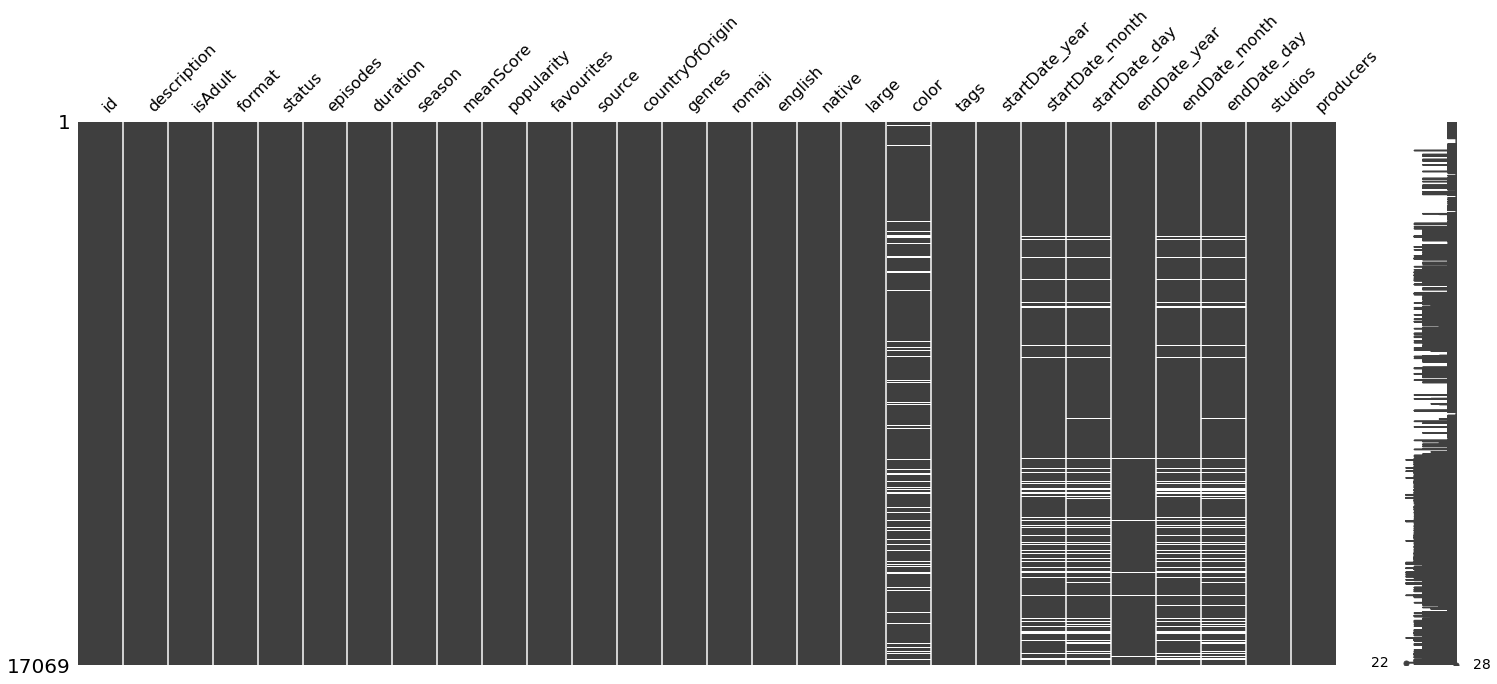

In [7]:
msno.matrix(df)

In [ ]:
pd.read_csv('../data/

In [9]:
import sys
import os

sys.path.append(os.path.abspath('../anime_recommender'))

In [10]:
from anilist_etl.APITransformer import APITransformer

In [11]:
tf = APITransformer(df)

In [12]:
df_transformed = tf.transform_pipe()

,id,description,duration,meanScore,popularity,favourites,romaji,english,native,large,...,season_UNDEFINED,season_WINTER,source_LIGHT_NOVEL,source_MANGA,source_ORIGINAL,source_OTHER,source_UNDEFINED,source_VIDEO_GAME,source_VISUAL_NOVEL,description_cleaned
0,1,"Enter a world in the distant future, where Bou...",0.096639,0.926829,0.455712,0.346083,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,0,1,0,0,0,0,enter world distant future bounty hunter roam ...
1,5,"As the Cowboy Bebop crew travels the stars, th...",0.478992,0.878049,0.085034,0.017200,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,カウボーイビバップ天国の扉,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,0,1,0,0,0,0,cowboy bebop crew travel star learn largest bo...
2,6,Vash the Stampede is a wanted man with a habit...,0.096639,0.841463,0.151158,0.061563,TRIGUN,Trigun,TRIGUN,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,1,0,0,0,0,0,vash stampede wanted man habit turning entire ...
3,7,Robin Sena is a powerful craft user drafted in...,0.100840,0.707317,0.021154,0.001978,Witch Hunter ROBIN,Witch Hunter ROBIN,Witch Hunter ROBIN,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,0,1,0,0,0,0,robin sena powerful craft user drafted stnj gr...
4,8,It is the dark century and the people are suff...,0.092437,0.658537,0.002960,0.000160,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,1,0,0,0,0,0,dark century people suffering rule devil vande...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17064,155739,Included as a bonus feature on the Magic Knigh...,0.016807,0.621951,0.000032,0.000000,Magic Knight Rayearth Pilot,Magic Knight Rayearth Pilot,魔法騎士（マジックナイト）レイアース パイロットフィルム,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,1,0,1,0,0,0,0,0,included bonus feature magic knight rayearth m...
17065,155740,DVD-BOX special added to the 3rd volume. It sh...,0.008403,0.890244,0.000006,0.000000,Catue Aheri Iki Shussan-shin,Catue Aheri Iki Shussan-shin,カチュアアヘりイキ出産シーン,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,0,0,0,0,0,1,dvd box special added 3rd volume show event 3r...
17066,155767,A set of promotional videos for the Pokémon Sc...,0.012605,0.621951,0.000491,0.000053,Donna Monja TV,Donna Monja TV,ドンナモンジャTV,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,0,0,0,0,1,0,set promotional video pokémon scarlet pokémon ...
17067,155773,Music video for <i>Dorothy</I> by KANKAN.,0.004202,0.865854,0.000010,0.000000,Dorothy,Dorothy,ドロシー,https://s4.anilist.co/file/anilistcdn/media/an...,...,0,0,0,0,1,0,0,0,0,music video dorothy kankan


In [13]:
tf

,id,description,isAdult,format,status,episodes,duration,season,meanScore,popularity,...,color,tags,startDate_year,startDate_month,startDate_day,endDate_year,endDate_month,endDate_day,studios,producers
0,1,"Enter a world in the distant future, where Bou...",False,TV,FINISHED,26.0,24.0,SPRING,86.0,282812,...,#f1785d,"[(Space, 94), (Crime, 92), (Episodic, 88), (En...",1998.0,4.0,3.0,1999.0,4.0,24.0,[Sunrise],"[Bandai Visual, Bandai Entertainment]"
1,5,"As the Cowboy Bebop crew travels the stars, th...",False,MOVIE,FINISHED,1.0,115.0,SUMMER,82.0,52773,...,#f13500,"[(Terrorism, 96), (Primarily Adult Cast, 83), ...",2001.0,9.0,1.0,2001.0,9.0,1.0,"[bones, Sunrise]","[Bandai Visual, Manga Entertainment, Funimation]"
2,6,Vash the Stampede is a wanted man with a habit...,False,TV,FINISHED,26.0,24.0,SPRING,79.0,93809,...,#f1e4c9,"[(Guns, 90), (Fugitive, 90), (Philosophy, 85),...",1998.0,4.0,1.0,1998.0,9.0,30.0,[MADHOUSE],"[Nippon Victor, Arts Pro, Funimation]"
3,7,Robin Sena is a powerful craft user drafted in...,False,TV,FINISHED,26.0,25.0,SUMMER,68.0,13130,...,#e4935d,"[(Female Protagonist, 100), (Witch, 80), (Magi...",2002.0,7.0,2.0,2002.0,12.0,24.0,[Sunrise],"[Bandai Visual, Bandai Entertainment]"
4,8,It is the dark century and the people are suff...,False,TV,FINISHED,52.0,23.0,FALL,64.0,1839,...,#e46b50,"[(Shounen, 79)]",2004.0,9.0,30.0,2005.0,9.0,29.0,[],[Toei Animation]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17064,155739,Included as a bonus feature on the Magic Knigh...,False,SPECIAL,FINISHED,1.0,5.0,WINTER,61.0,22,...,#863528,[],1996.0,2.0,14.0,1996.0,2.0,14.0,[Tokyo Movie Shinsha],[]
17065,155740,DVD-BOX special added to the 3rd volume. It sh...,True,SPECIAL,FINISHED,1.0,3.0,SUMMER,83.0,6,...,#febb28,[],2012.0,9.0,14.0,2012.0,9.0,14.0,[Studio 9 Maiami],[]
17066,155767,A set of promotional videos for the Pokémon Sc...,False,ONA,FINISHED,2.0,4.0,10.0,61.0,307,...,#e4c95d,"[(Full CGI, 79), (Advertisement, 40)]",2022.0,10.0,12.0,2022.0,10.0,14.0,[Ijigen TOKYO],[The Pokemon Company International]
17067,155773,Music video for <i>Dorothy</I> by KANKAN.,False,MUSIC,FINISHED,1.0,2.0,8.0,81.0,8,...,None,[],2022.0,8.0,5.0,2022.0,8.0,5.0,[],[]
